In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("LoanData.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.describe(include = "object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

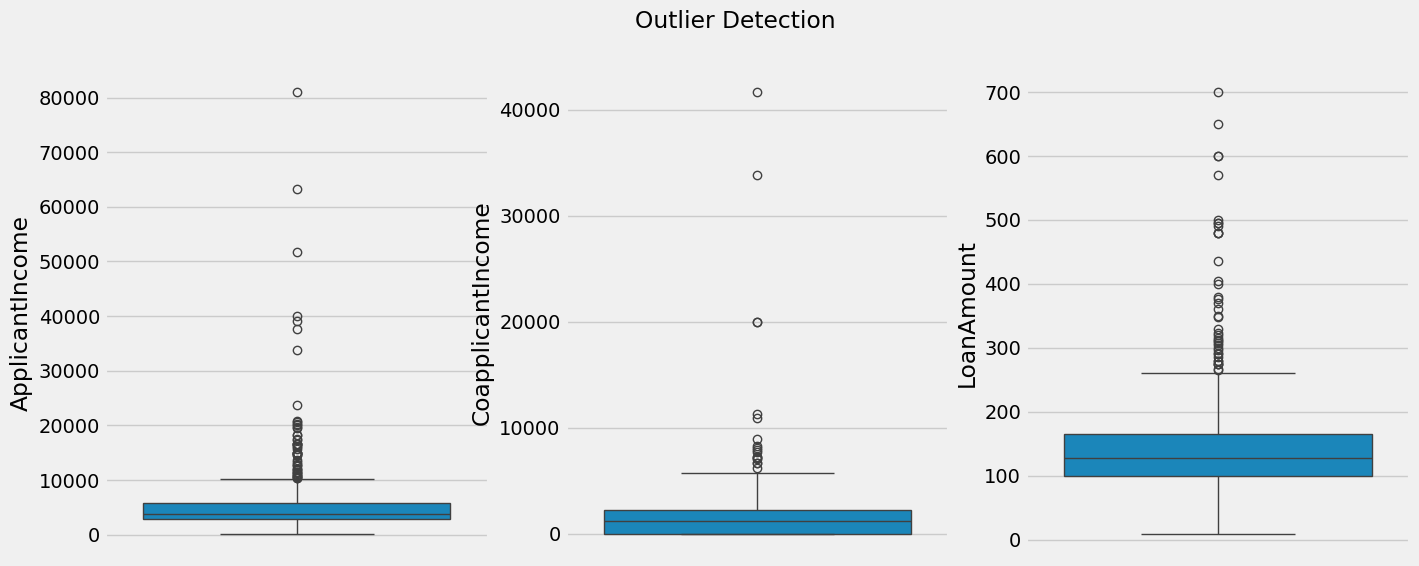

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outlier Detection")
plt.show()


In [13]:
print("Before Removing the outliers ", data.shape)
data = data[data['ApplicantIncome'] < 25000]

print("After Removing the outliers ", data.shape)

Before Removing the outliers  (614, 13)
After Removing the outliers  (607, 13)


In [14]:
print("Before Removing the outliers ", data.shape)
data = data[data['CoapplicantIncome'] < 12000]

print("After Removing the outliers ", data.shape)

Before Removing the outliers  (607, 13)
After Removing the outliers  (603, 13)


In [15]:
print("Before Removing the outliers ", data.shape)
data = data[data['LoanAmount'] < 400]

print("After Removing the outliers ", data.shape)

Before Removing the outliers  (603, 13)
After Removing the outliers  (591, 13)


C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\3998265973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='green')
C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\3998265973.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'], c

<Axes: xlabel='LoanAmount', ylabel='Density'>

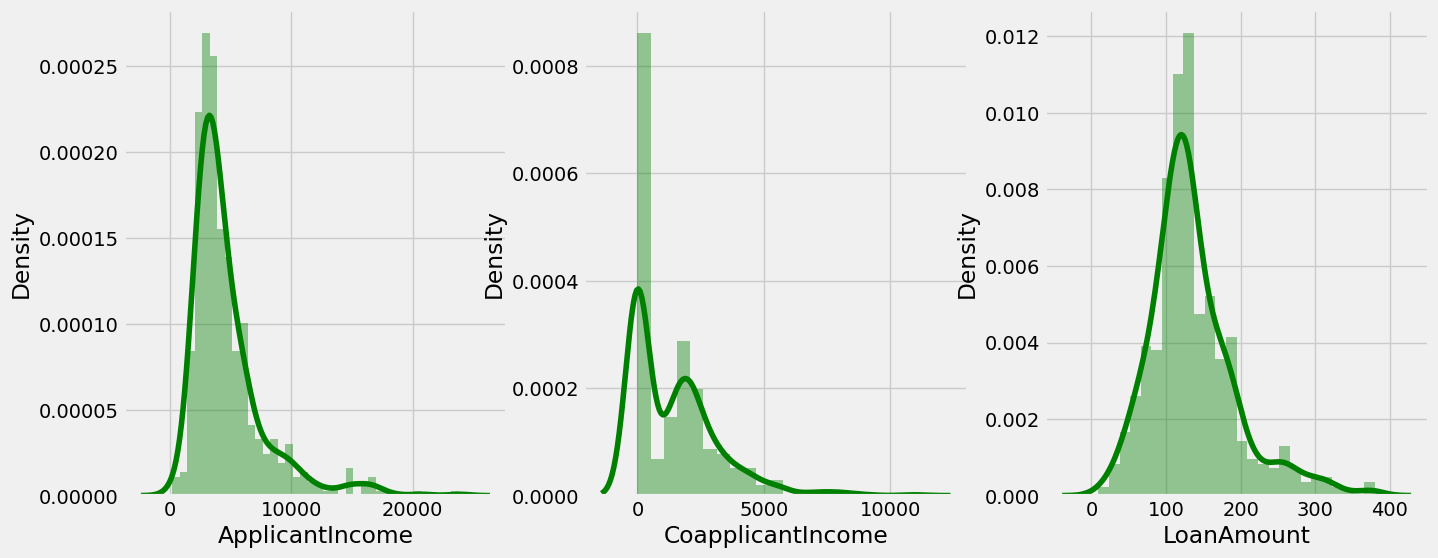

In [16]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\769170851.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='green')
C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\769170851.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'], col

Text(0.5, 0.98, 'After Log Transformation data')

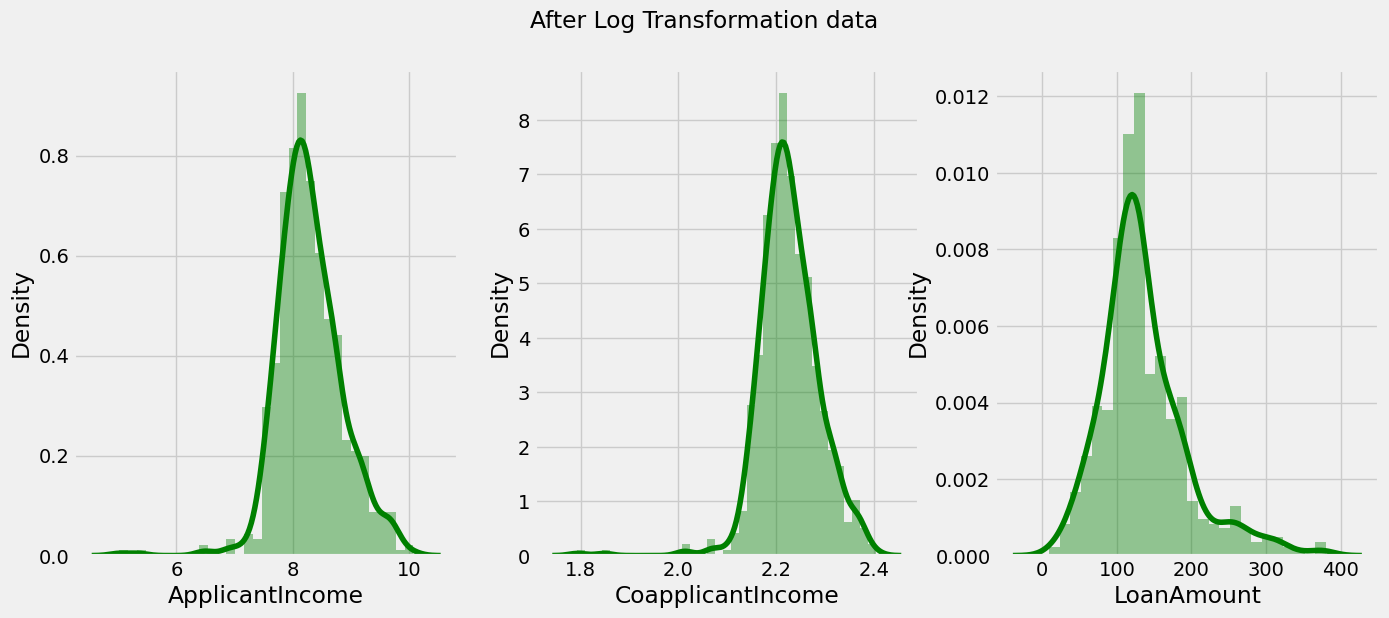

In [17]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['ApplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

plt.suptitle('After Log Transformation data')

In [18]:
num = data.select_dtypes('number').columns.tolist();
cat = data.select_dtypes('object').columns.tolist();

In [19]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [20]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

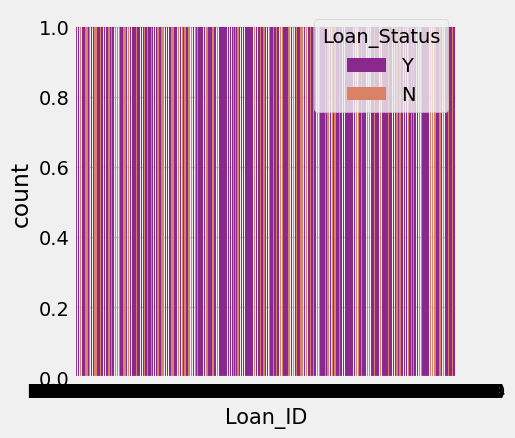

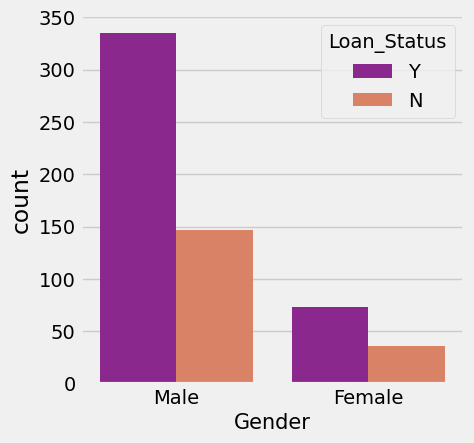

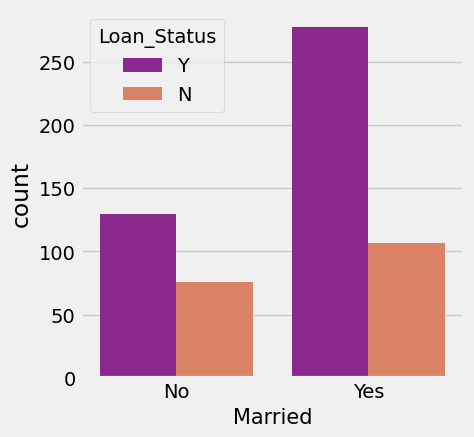

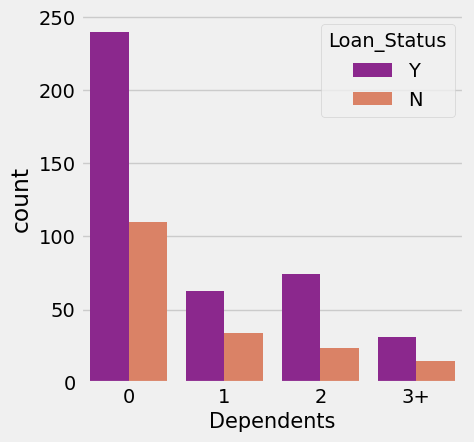

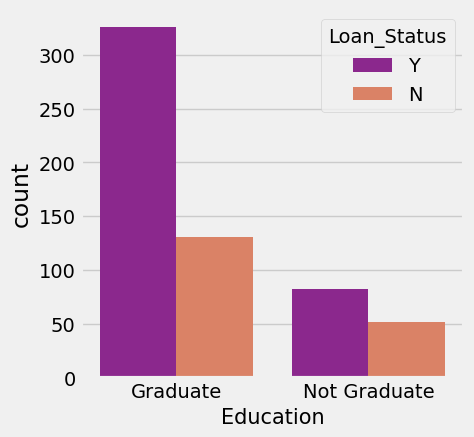

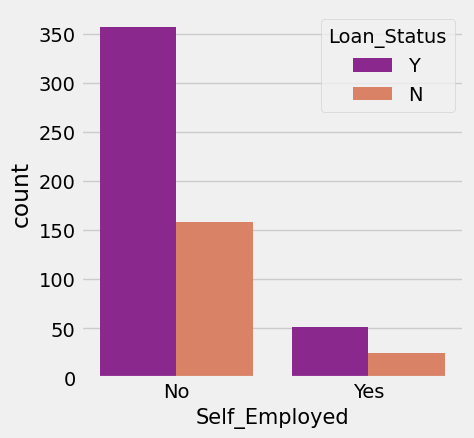

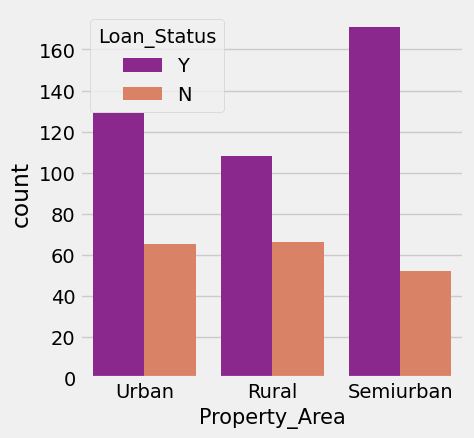

In [21]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Loan_Status', data=data, palette = "plasma")
    plt.xlabel(i, fontsize=15)

In [22]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
print(pd.crosstab(data['Loan_Status'],data['Married']))


Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [24]:
print(pd.crosstab(data['Loan_Status'],data['Education']))


Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [25]:
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))


Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [26]:
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))


Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [27]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [28]:
data = data.drop(['Loan_ID'],axis=1)

In [29]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [30]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Gender'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1,1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1','2','3+'),(0,1,1,1))

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\3896326342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\3896326342.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
C:\Users\rajeev\AppData\Local\Temp\ipykernel_12312\3896326342.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,8.674026,2.269445,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,2.243908,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,2.197932,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,2.181175,120.0,360.0,1.0,1,1
4,1,1,0,1,0,8.699515,2.272076,141.0,360.0,1.0,1,1


In [32]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [33]:
x.shape

(591, 11)

In [34]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

In [39]:
y.shape

(591,)

In [40]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 262.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 245.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 438.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 568.9 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/257.7 kB 583.1 kB/s eta 0:00:01
   -------------------------------------- 257.7/257.7 kB 793.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
x_rasample, y_rasample = SMOTE().fit_resample(x,y.values.ravel())

In [37]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.4 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 

In [42]:
x_train, y_train, x_test, y_test = train_test_split(x_rasample, y_rasample, test_size=0.2, random_state=0)

In [43]:
print(x_rasample.shape)
print(y_rasample.shape)

(816, 11)
(816,)


In [44]:
x_train.shape

(652, 11)

In [45]:
y_test.shape

(164,)

Model building